In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("AirQualityUCI.xlsx")

In [3]:
airQuality = data.copy()

In [4]:
# Attribute Information:

# 0 Date (DD/MM/YYYY)
# 1 Time (HH.MM.SS)
# 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
# 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
# 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
# 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
# 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
# 7 True hourly averaged NOx concentration in ppb (reference analyzer)
# 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
# 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
# 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
# 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
# 12 Temperature in Â°C
# 13 Relative Humidity (%)
# 14 AH Absolute Humidity



In [5]:
airQuality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


## Data Cleaning

In [6]:
airQuality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
airQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [8]:
airQuality.shape

(9357, 15)

In [9]:
# fatch year from date
airQuality["Date"] = airQuality["Date"].dt.year

In [10]:
# drop time colum from data
airQuality.drop("Time",axis=1,inplace=True)

In [11]:
airQuality.drop("Date",axis=1,inplace=True)

In [12]:
# no null value in dataset
airQuality.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
# check duplicated valu in dataset
airQuality.duplicated().sum()

31

In [14]:
# drop duplicate valu from data
airQuality.drop_duplicates(inplace=True)

In [15]:
airQuality.shape

(9326, 13)

In [16]:
airQuality.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000
mean,-33.677954,1053.020945,-158.954107,2.536585,898.114045,169.829455,798.179328,58.993952,1396.653022,978.857120,10.473905,40.279664,-6.195524
std,77.212965,322.395213,140.001322,39.775508,337.007823,256.971827,317.352355,126.265174,458.854578,452.623264,41.544695,49.401077,37.413633
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,922.500000,-200.000000,4.041180,713.000000,51.000000,638.812500,53.850000,1187.750000,702.250000,11.000000,34.225000,0.695943
50%,1.500000,1053.250000,-200.000000,7.919863,895.875000,142.000000,795.000000,96.300000,1447.000000,943.500000,17.275000,48.625000,0.979225
75%,2.600000,1221.937500,-200.000000,13.658956,1105.500000,284.975000,961.000000,133.000000,1662.437500,1256.500000,24.100000,61.925000,1.298629
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


<AxesSubplot:>

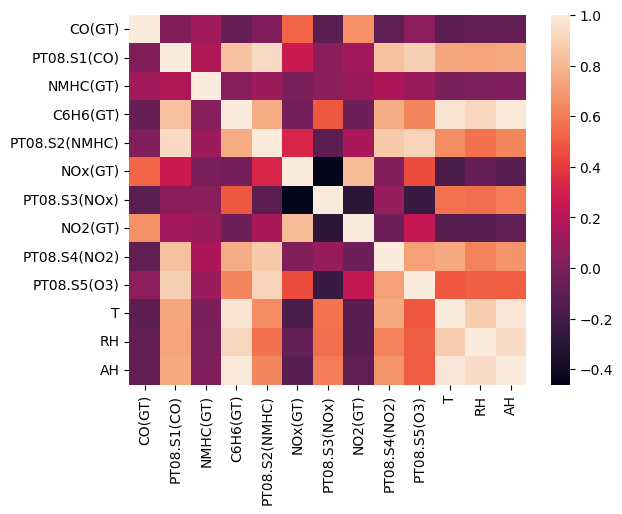

In [17]:
sns.heatmap(airQuality.corr())

In [23]:
# saparate depended variable and indipendent variavle 
x = airQuality.iloc[:,:-1]
y = airQuality.iloc[:,-1]

In [24]:
# divide train test split on data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
X_train.shape

(6248, 12)

In [26]:
y_train.shape

(6248,)

In [27]:
X_test.shape

(3078, 12)

In [28]:
y_test.shape

(3078,)

In [29]:
# feature scalling standardlazation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

## LinearRegression

In [35]:
# model selection
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [36]:
linear.fit(X_train,y_train)

LinearRegression()

In [37]:
linear.coef_

array([-2.47604148e-02, -1.67935857e-01,  2.46665785e-01,  3.09387625e+01,
       -6.01017658e+00, -8.63304570e-01, -3.24471505e-01,  6.84895027e-01,
       -2.27193039e+00,  3.49960050e-01,  9.46694373e+00,  3.65118730e+00])

In [38]:
linear.intercept_

-6.308866681874624

In [40]:
y_predict = linear.predict(X_test)

In [41]:
# MSE & MAE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
mse = mean_squared_error(y_test,y_predict)
print(mse*100)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae)*100)

103.407830295495
87.28588676389313


In [51]:
## check accuracy R2 and ADjusted R square
r2score = r2_score(y_test,y_predict)
print(r2score)

0.9992374575047931


In [50]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.999236474952453

## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [53]:
ridge.fit(X_train,y_train)

Ridge()

In [58]:
y_predict = ridge.predict(X_test)

In [59]:
mse = mean_squared_error(y_test,y_predict)
print(mse*100)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae)*100)

103.81296066957806
87.57452038004756


In [60]:
## check accuracy R2 and ADjusted R square
r2score = r2_score(y_test,y_predict)
print(r2score)

0.9992344700218775


In [61]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9992334836201018

## Lasso Regression

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10.0)

In [63]:
lasso.fit(X_train,y_train)

Lasso(alpha=10.0)

In [64]:
y_predict = lasso.predict(X_test)

In [66]:
mse = mean_squared_error(y_test,y_predict)
print(mse*100)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae)*100)

11589.103658764865
218.0661343636003


In [67]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9992334836201018

In [68]:
## check accuracy R2 and ADjusted R square
r2score = r2_score(y_test,y_predict)
print(r2score)

0.9145404753594207


In [69]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=20.0)

In [70]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [71]:
y_predict = elastic.predict(X_test)

In [73]:
mse = mean_squared_error(y_test,y_predict)
print(mse*100)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae)*100)

84412.09576925385
330.4401887311935


In [74]:
## check accuracy R2 and ADjusted R square
r2score = r2_score(y_test,y_predict)
print(r2score)

0.3775344676549117


In [75]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.3767324074822347

In [76]:
y_predict

array([ -7.91601352,  -3.407234  , -47.55545992, ...,  -3.07430041,
        -5.8261137 ,  -5.19524603])